# Приложения Procrastinate Pro+

#### Наша задача 
Проанализировать развлекательное приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

#### Описание исходных данных
В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.

#### Структура visits_info_short.csv

-User Id — уникальный идентификатор пользователя,

-Region — страна пользователя,

-Device — тип устройства пользователя,

-Channel — идентификатор источника перехода,

-Session Start — дата и время начала сессии,

-Session End — дата и время окончания сессии.

#### Структура orders_info_short.csv

-User Id — уникальный идентификатор пользователя,

-Event Dt — дата и время покупки,

-Revenue — сумма заказа.

#### Структура costs_info_short.csv

-Channel — идентификатор рекламного источника,

-Dt — дата проведения рекламной кампании,

-Costs — расходы на эту кампанию.

#### План проекта:
-Загрузить данные и подготовим их к анализу;

-Задать функции для расчета и анализа LTV, ROI, удержания и конверсии;

-Провести исследовательский анализ данных;

-Визуализировать данные;

-Выяснить сколько денег ушло на маркетинг;

-Написать выводы и рекомендации.



# Шаг 1. Загрузим данные и подготовим их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
font = {'family': 'sans-serif',
       'color': '#a72693',
       'weight': 'normal',
       'size': 20,
       }

In [4]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

ПРЕДОБРАБОТКА visits

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
visits.duplicated().sum()

0

In [8]:
#переименуем столбцы и приведем данные в порядок
visits.columns.to_list()

['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End']

In [9]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [10]:
#проверим
visits.columns.to_list()

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [11]:
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format = '%Y-%m-%d %H:%M:%S')

In [12]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


ПРЕДОБРАБОТКА orders

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [15]:
orders.duplicated().sum()

0

In [16]:
#меняем названия столбцов
orders.columns.to_list()

['User Id', 'Event Dt', 'Revenue']

In [17]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [18]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


ПРЕДОБРАБОТКА costs

In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [20]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


In [21]:
costs.duplicated().sum()

0

In [22]:
#переименуем столбцы
costs.columns = ['dt', 'channel', 'costs']

In [23]:
costs.tail()

,dt,channel,costs
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80
1799,2019-10-27,lambdaMediaAds,12.00


In [24]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Выгрузили данные, привели названия столбцов и даты в порядок

# Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

In [25]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [26]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'costs'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'costs': 'mean'})
            .rename(columns={'costs': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [28]:
#создадим пользовательские профили
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['costs'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'costs']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['costs'] = profiles['costs'].fillna(0)

    return profiles

In [29]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [30]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [32]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [33]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)


,user_id,first_ts,channel,device,region,dt,month,payer,costs
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


In [34]:
profiles.groupby('channel').agg({'user_id': 'nunique'})

,user_id
channel,
AdNonSense,3880
FaceBoom,29144
LeapBob,8553
MediaTornado,4364
OppleCreativeMedia,8605
RocketSuperAds,4448
TipTop,19561
WahooNetBanner,8553
YRabbit,4312


In [35]:
#найдем минимальную дату привлечения
min_analysis_date = profiles['first_ts'].min()
min_analysis_date

Timestamp('2019-05-01 00:00:41')

In [36]:
#найдем максимальную дату привлечения
max_analysis_date = profiles['first_ts'].max()
max_analysis_date

Timestamp('2019-10-27 23:59:04')

# Шаг 3. Проведëм исследовательский анализ данных
Выясним:
- Из каких стран приходят посетители. Какие страны дают больше всего платящих пользователей.
- Какими устройствами они пользуются. С каких устройств чаще всего заходят платящие пользователи.
- По каким рекламным каналам шло привлечение пользователей. Какие каналы приносят больше всего платящих пользователей.

In [37]:
profiles['user_id'].count()

150008

In [38]:
profiles['payer'] = profiles.query('payer == True')
profiles['payer'].count()

8881

In [39]:
region_payer = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'count'})
region_payer

,user_id,payer
region,,
France,17450,663
Germany,14981,616
UK,17575,700
United States,100002,6902


In [40]:
region_payer['percents'] = region_payer['payer'] / region_payer['user_id'] * 100

In [41]:
region_payer.sort_values('percents',ascending = False)
region_payer

,user_id,payer,percents
region,,,
France,17450,663,3.80
Germany,14981,616,4.11
UK,17575,700,3.98
United States,100002,6902,6.90


США по платящим пользователям вырывается в лидеры

In [42]:
device_payer = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'nunique'})
device_payer

,user_id,payer
device,,
Android,35032,2050
Mac,30042,1912
PC,30455,1537
iPhone,54479,3382


In [43]:
device_payer['percents'] = device_payer['payer'] / device_payer['user_id'] * 100

In [44]:
device_payer.sort_values('percents',ascending = False)

,user_id,payer,percents
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


Самое большое число платных пользователей из обладателей яблочной продукции

In [45]:
channel_payer = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'nunique'})
channel_payer

,user_id,payer
channel,,
AdNonSense,3880,440
FaceBoom,29144,3557
LeapBob,8553,262
MediaTornado,4364,156
OppleCreativeMedia,8605,233
RocketSuperAds,4448,352
TipTop,19561,1878
WahooNetBanner,8553,453
YRabbit,4312,165


In [46]:
channel_payer['percents'] = channel_payer['payer'] / channel_payer['user_id'] * 100

In [47]:
channel_payer.sort_values('percents',ascending = False)
channel_payer

,user_id,payer,percents
channel,,,
AdNonSense,3880,440,11.34
FaceBoom,29144,3557,12.20
LeapBob,8553,262,3.06
MediaTornado,4364,156,3.57
OppleCreativeMedia,8605,233,2.71
RocketSuperAds,4448,352,7.91
TipTop,19561,1878,9.60
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83


Самое большое число платных пользователей из канала Faceboom, AdNonSense и lambdaMediaAds

# Шаг 4. Маркетинг

Выясним:
- Сколько денег потратили.Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [48]:
#сколько денег потратили всего
costs['costs'].sum()

105497.30000000002

In [49]:
#сумма на каждый источник
costs_by_sourse = costs.groupby('channel')['costs'].sum().reset_index()
costs_by_sourse

,channel,costs
0,AdNonSense,"3,911.25"
1,FaceBoom,"32,445.60"
2,LeapBob,"1,797.60"
3,MediaTornado,954.48
4,OppleCreativeMedia,"2,151.25"
5,RocketSuperAds,"1,833.00"
6,TipTop,"54,751.30"
7,WahooNetBanner,"5,151.00"
8,YRabbit,944.22
9,lambdaMediaAds,"1,557.60"


In [50]:
costs_by_sourse['in_percents'] = costs_by_sourse['costs'] / 105497.30000000002 * 100

In [51]:
costs_by_sourse.sort_values('in_percents',ascending = False)

,channel,costs,in_percents
6,TipTop,"54,751.30",51.90
1,FaceBoom,"32,445.60",30.75
7,WahooNetBanner,"5,151.00",4.88
0,AdNonSense,"3,911.25",3.71
4,OppleCreativeMedia,"2,151.25",2.04
5,RocketSuperAds,"1,833.00",1.74
2,LeapBob,"1,797.60",1.70
9,lambdaMediaAds,"1,557.60",1.48
3,MediaTornado,954.48,0.90
8,YRabbit,944.22,0.90


Самые большие расходны на каналы TipTop и FaceBoom

In [52]:
#по времени
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date

In [53]:
costs.groupby('costs_month')['costs'].sum().reset_index


<bound method Series.reset_index of costs_month
2019-05-01    9,978.57
2019-06-01   15,090.05
2019-07-01   16,447.06
2019-08-01   20,657.87
2019-09-01   22,441.34
2019-10-01   20,882.41
Name: costs, dtype: float64>

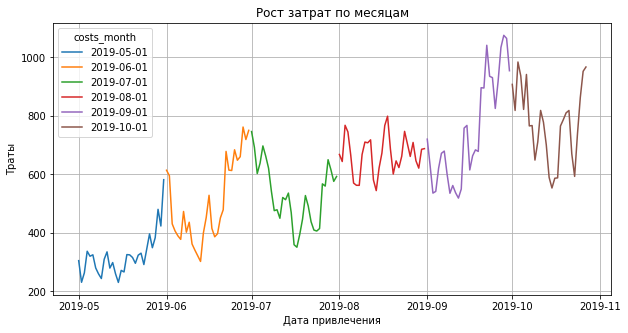

In [54]:
# строим график истории изменений CAC по каналам привлечения

costs.pivot_table(
    index='dt', columns='costs_month', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Траты')
plt.xlabel('Дата привлечения')
plt.title('Рост затрат по месяцам')
plt.show()

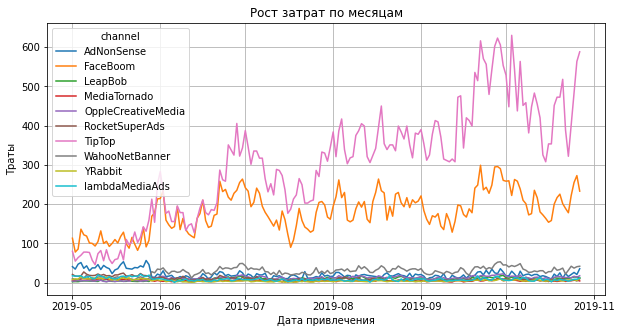

In [55]:
# строим график с разбивкой по каналам

costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Траты')
plt.xlabel('Дата привлечения')
plt.title('Рост затрат по месяцам')
plt.show()

Затраты растут с каждым месяцем, в октябре были самые большие затраты, на TipTop  и FaceBoom тратится больше всего денег, все остальные каналы примерно на одном уровне по тратам


In [56]:
profiles = get_profiles(visits, orders, costs)

profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,costs
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


In [57]:
profiles = profiles.query('channel != "organic"')

In [58]:
#общий САС
profiles['costs'].mean()

1.1274813239427588

In [59]:
#рассчитали средний САС по каналам привлечения за исключением organic

profiles.groupby('channel').agg({'costs':'mean'}).sort_values(by='costs')


,costs
channel,
LeapBob,0.21
MediaTornado,0.22
YRabbit,0.22
OppleCreativeMedia,0.25
RocketSuperAds,0.41
WahooNetBanner,0.60
lambdaMediaAds,0.72
AdNonSense,1.01
FaceBoom,1.11


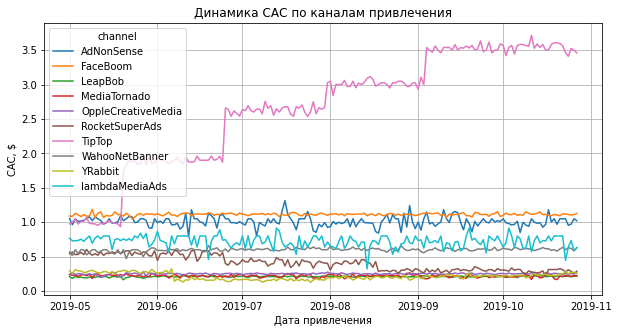

In [60]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Затраты на TipTop и FaceBoom самые высокие, стоимость одного привлеченного пользователя самая высокая у TipTop, на других каналах звтраты на  каждого пользователя стабильны.Затраты на рекламу увеличиваются с каждым месяцем.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируем общую окупаемость рекламы

In [61]:
observation_date = datetime(2020, 11, 1).date()  # момент анализа
horizon_days = 14  

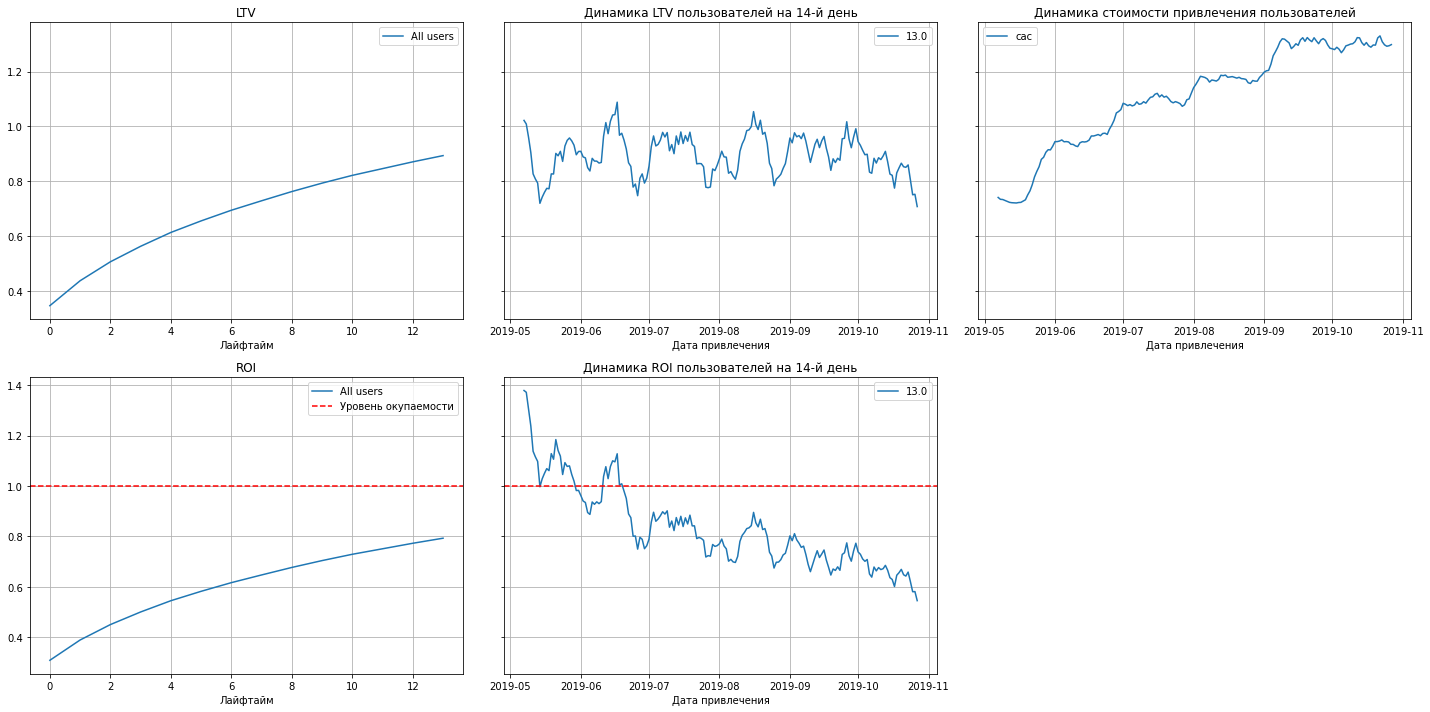

In [62]:
# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Стоимость привлечения пользователей растет

- Лайфтайм растет

- ROI падает

- CAC растет

- Окупаемость только в первые дни, далее окупаемость падает

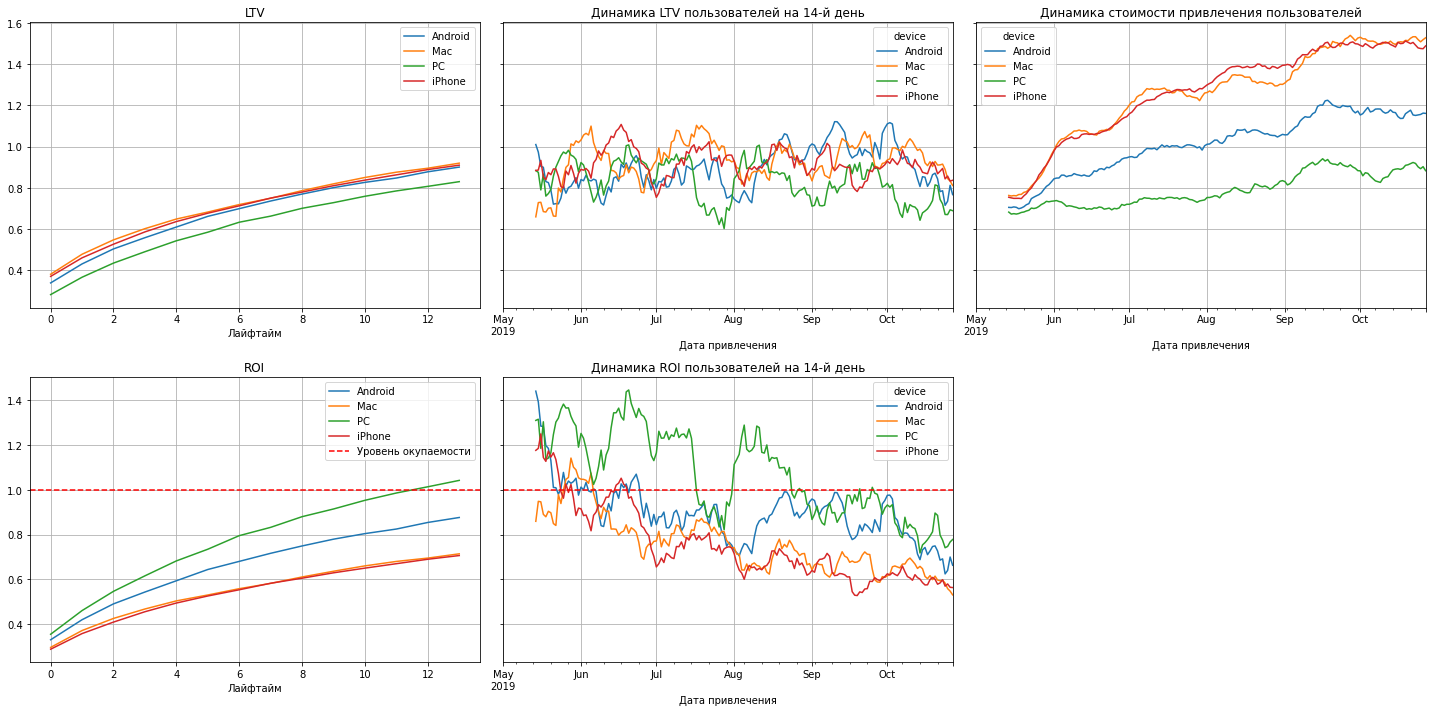

In [63]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Лайфтайм у всех пользователей растет

- Стоимость привлечения пользователей с каждым месяцем растет, но самый низкий у PC

- До уровня окупаемости дошел только PC 

- ROI самый высокий у PC

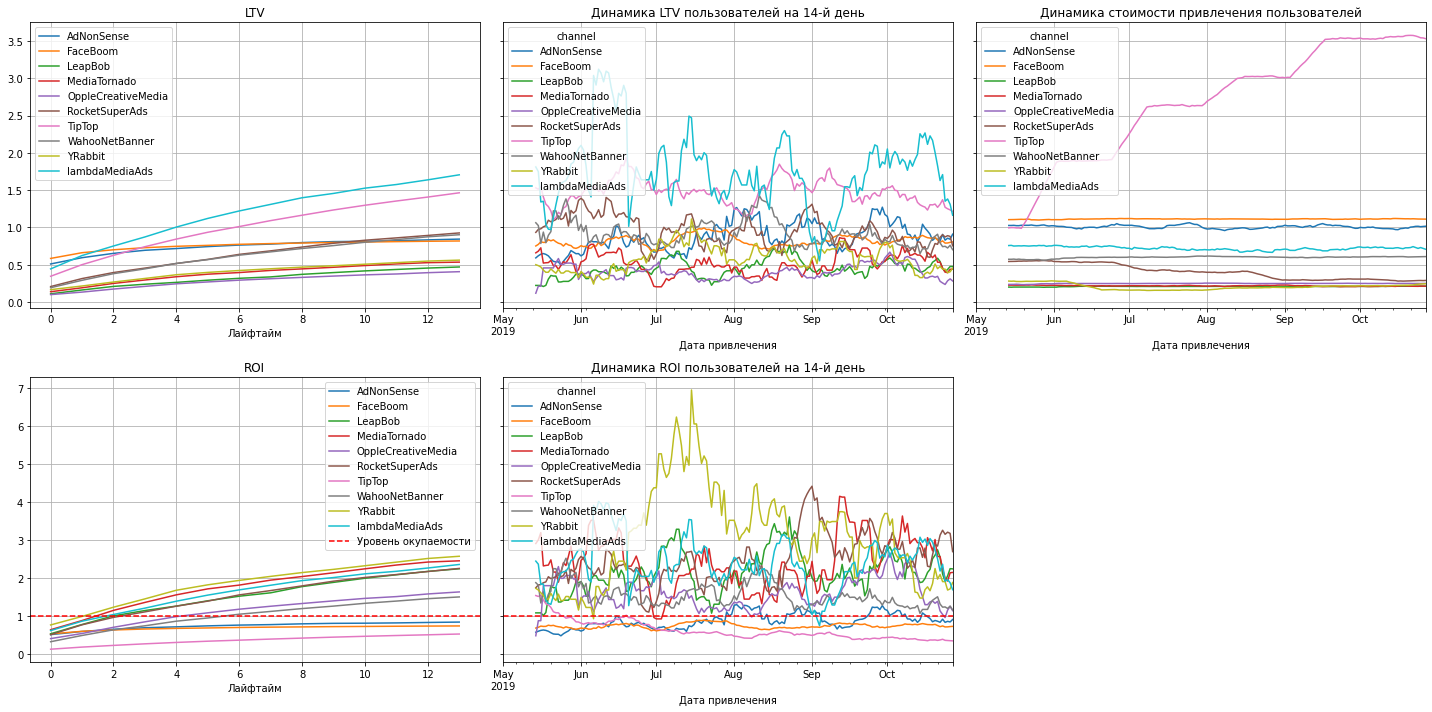

In [64]:
# смотрим окупаемость с разбивкой по источникам привлечения
profiles = profiles.query('channel != "organic"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

- Стоимость привлечения клиента у всех стабильна, кроме Tip Top, у него стоимость привлечения клиента растет

- До окупаемости не дошли TipTop,AdNonSence и FaceBoom

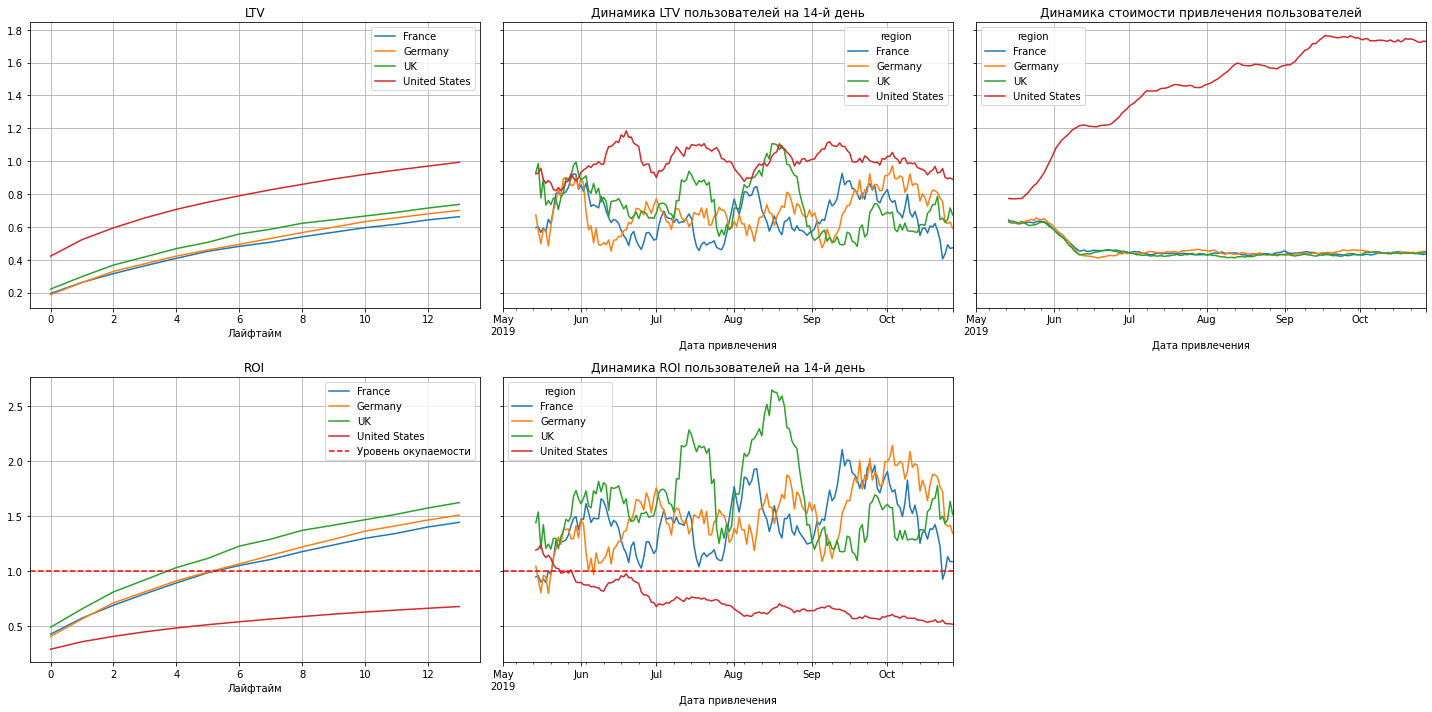

In [65]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

- Окупаются все кроме США

- Стоимость привлечения в США растет,  у других стран стабильна

- Динамика ROI идет на резкий спад

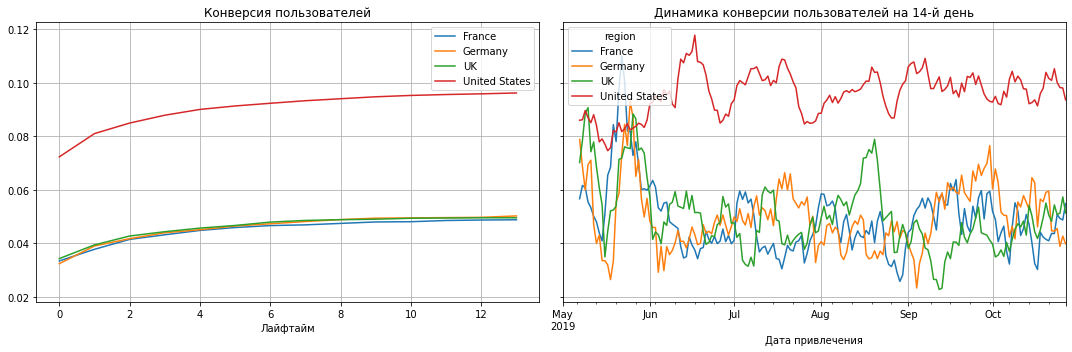

In [66]:
# смотрим конверсию с разбивкой по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая высокая конверсия у США

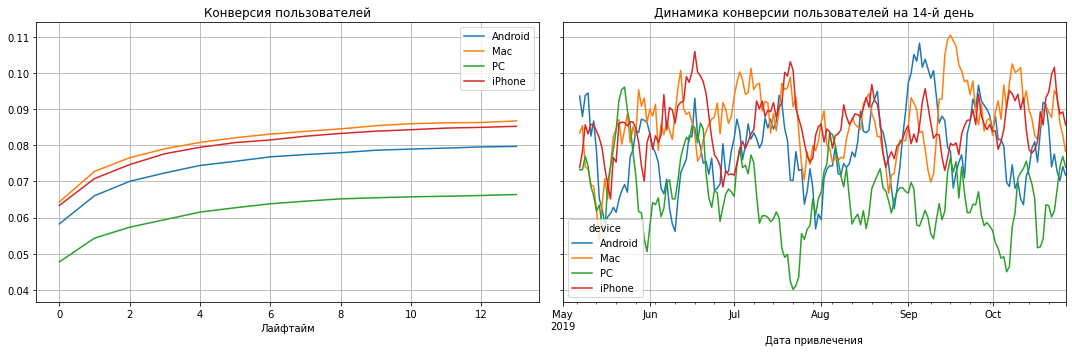

In [67]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Лучше всего конверсия у MAC  и IPhone, самая низкая у PC

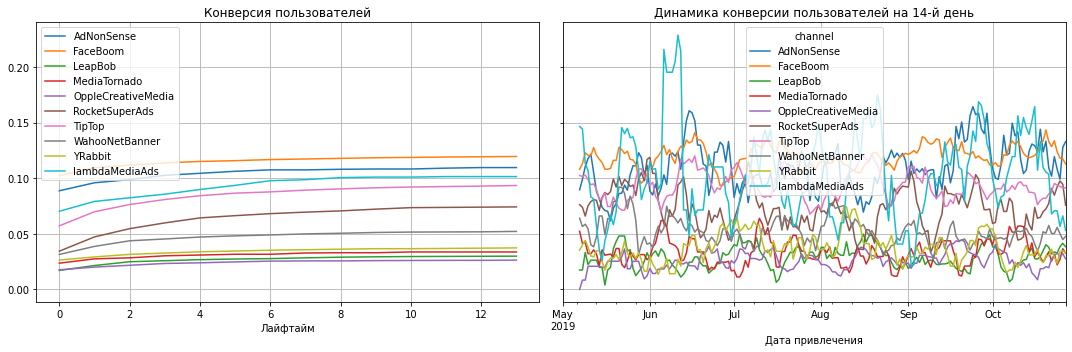

In [68]:

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Лучше всего конверсия у FaceBoom

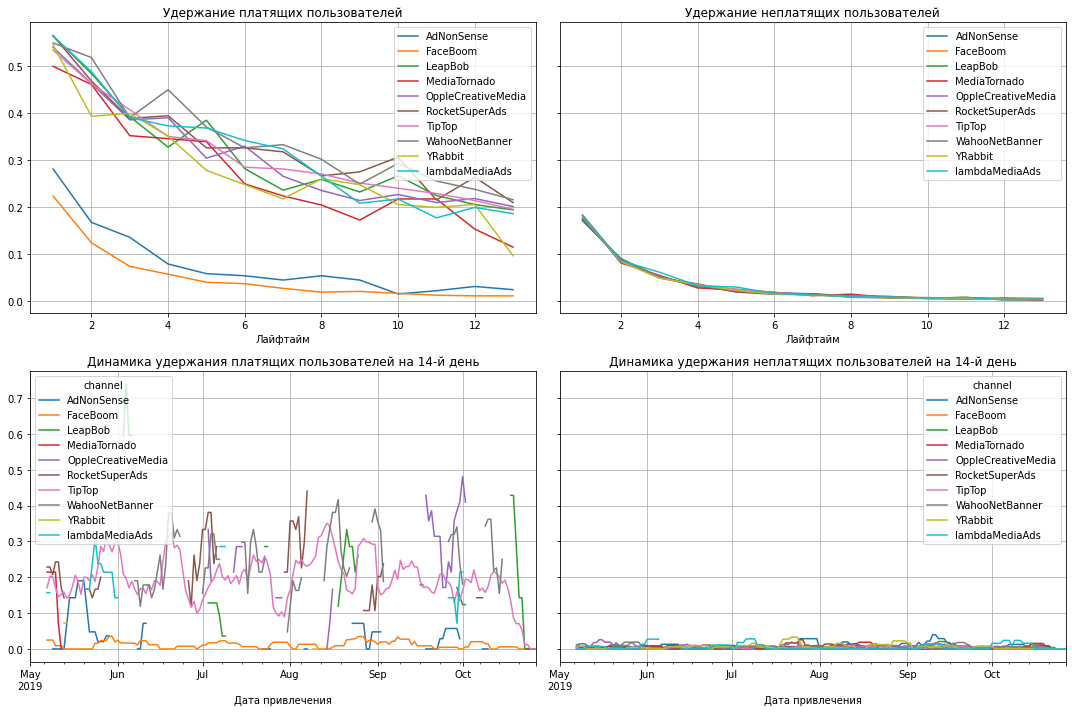

In [69]:
# смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самое плохое удержание на каналах FaceBoom и AdNonSense

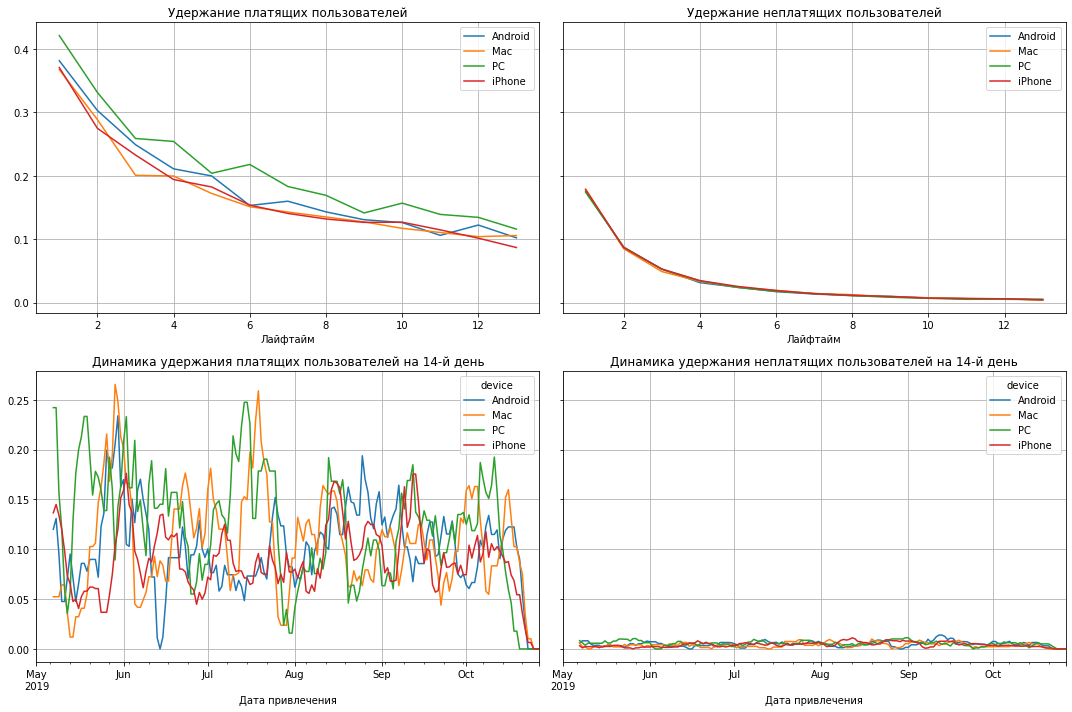

In [70]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платных пользователей к 14 дню падает, картина у всех примерно одинаковая

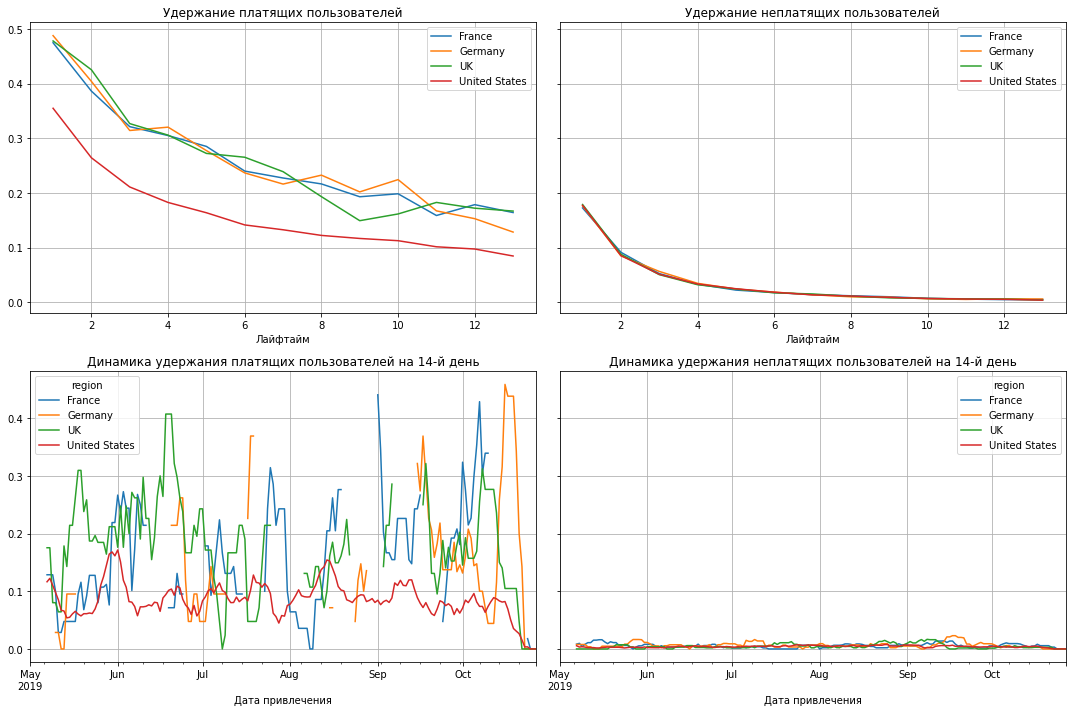

In [71]:
# смотрим удержание с разбивкой по регионам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей из США ниже остальных , хотя платящих пользователей из США больше всего. Видимо все проблеммы в удержании пользователей из США.

In [72]:
#посморим популярность устройств и каналов по регионам
profiles[profiles['region'] == 'United States'].groupby('region')['device'].value_counts()


region         device 
United States  iPhone     27548
               Mac        15424
               Android    12436
               PC          6421
Name: device, dtype: int64

In [73]:
profiles[profiles['region'] == 'United States'].groupby('region')['channel'].value_counts()

region         channel       
United States  FaceBoom          29144
               TipTop            19561
               RocketSuperAds     4448
               MediaTornado       4364
               YRabbit            4312
Name: channel, dtype: int64

Самые затратные каналы и устройства Apple популярны больше всего в США 

In [74]:
profiles[profiles['region'] == 'UK'].groupby('region')['device'].value_counts()

region  device 
UK      PC         4551
        Android    3243
        iPhone     2274
        Mac        1086
Name: device, dtype: int64

In [75]:
profiles[profiles['region'] == 'UK'].groupby('region')['channel'].value_counts()

region  channel           
UK      OppleCreativeMedia    3052
        LeapBob               3046
        WahooNetBanner        3003
        AdNonSense            1295
        lambdaMediaAds         758
Name: channel, dtype: int64

In [76]:
profiles[profiles['region'] == 'France'].groupby('region')['device'].value_counts()

region  device 
France  PC         4384
        Android    3313
        iPhone     2198
        Mac        1163
Name: device, dtype: int64

In [77]:
profiles[profiles['region'] == 'France'].groupby('region')['channel'].value_counts()

region  channel           
France  OppleCreativeMedia    2991
        LeapBob               2988
        WahooNetBanner        2971
        AdNonSense            1366
        lambdaMediaAds         742
Name: channel, dtype: int64

In [78]:
profiles[profiles['region'] == 'Germany'].groupby('region')['device'].value_counts()

region   device 
Germany  PC         3797
         Android    2849
         iPhone     1862
         Mac        1020
Name: device, dtype: int64

In [79]:
profiles[profiles['region'] == 'Germany'].groupby('region')['channel'].value_counts()

region   channel           
Germany  WahooNetBanner        2579
         OppleCreativeMedia    2562
         LeapBob               2519
         AdNonSense            1219
         lambdaMediaAds         649
Name: channel, dtype: int64

По Европе самое популярное устройство PC и каналы OppleCreativeMedia, LeapBob, WahooNetBanner

# ОБЩИЕ ВЫВОДЫ:


ROI (окупаемость рекламы)  превышает уровень окупаемости по всем Европейским странам, а в США так и не начинает окупаться. Конверсия платящих пользователей хоть в США и лучше всех, но динамика удержания платящих пользователей там очень плохая, и не факт, что ее удастся поправить, т.к. динамика стоимости привлечения пользователей в США и так безумно растет, намного опережая Европу (на графике хорошо видно).





# РЕКОМЕНДАЦИИ ДЛЯ ОТДЕЛА МАРКЕТИНГА:

Нужно разобраться с затратами на рекламу в США. По графикам с разбивкой на каналы и устройства мы видим возрастающую цену привлечения по яблочным девайсам, каналу TipTop и проблемы с удержанием у FaceBoom и у Европейского канала AdNonSense. Рекомендую уменьшить  траты на каналы TipTop, FaceBoom, AdNonSense и яблочные девайсы(популярными с США). Cосредоточиться на перспективных каналах в Европе: OppleCreativeMedia, LeapBob и WahooNetBannerи(у них хорошая окупаемость и удержание),на странах Европейского рынка и на устройствах PC и Android
